<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0926/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen0926/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen0926/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f3fec91e090>)

In [2]:
import pandas as pd
train = pd.read_csv("train.csv", encoding="utf-8")
predict = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
combine = pd.concat([train, predict], axis=0, ignore_index=True)
combine = combine.drop(["PassengerId", "Survived"], axis=1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 1. 補缺失值
s = combine.isna().sum()
s = s.sort_values(ascending=False)
s[s > 0]

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# 篩選操作: DataFrame/Series[跟你資料筆數依樣多的T/F]
test = pd.DataFrame([
    [1, 2],
    [3, 4]
])
test[[False, True]]

,0,1
1,3,4


In [7]:
# everything is an object
# 每一個東西都有形態
# 字典: dic = {}  操作: dic[key]
# 功能: int 操作: (4.23)
b = int
b(4.23)
def test2(case):
    if case == True:
        return int
    else:
        return str
test2(True)(4.23)

4

In [8]:
# Series.apply(轉換功能)
test = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"])
def square(n):
    return n * n
test["b"] = test["b"].apply(square)
test

,a,b
0,1,4
1,3,16


In [9]:
# demo
n = "Kelly, Mr. James"
n = n.split(".")[0].split(",")[-1]
n.strip()
# real
def transfer(n):
    n = n.split(".")[0].split(",")[-1]
    return n.strip() 
combine["Name"] = combine["Name"].apply(transfer)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
# value_counts()
dic = combine["Ticket"].value_counts()
def transfer(t):
    if pd.isna(t):
        return None
    else:
        return dic[t]
combine["Ticket"] = combine["Ticket"].apply(transfer)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C85,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C123,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C105,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [11]:
def transfer(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
combine["Cabin"] = combine["Cabin"].apply(transfer)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,None,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,NaN,0,0,1,8.0500,None,S


In [12]:
# 種類: Pclass, Name, Sex, Cabin, Embarked
# 數值: Age, SibSp, Parch, Ticket, Fare
# 種類: 捕最常出現
# 數值: 中位數
most = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(most)

In [13]:
med = combine.median().drop("Pclass")
combine = combine.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [14]:
# Step2. One-hot Encoding(一定)
# 太過稀少, 可以去掉(0, 0, 0)
counts = combine["Name"].value_counts()
f = counts > 50
whitelist = counts[f].index
whitelist

Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object')

In [15]:
def transfer(n):
    if n in whitelist:
        return n
    else:
        return None
combine["Name"] = combine["Name"].apply(transfer)

In [16]:
# 種類: 
# Pclass(偷懶, 有大小關係, 但我試過, 所以我還是做), 
# Name(必做)
# Sex(偷懶, 二值型, 但我還是會做)
# Cabin, Embarked(必做)
pd.set_option('display.max_columns', 50)
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns=["Pclass"])
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
# Step3. 推斷一些額外資訊
combine["Family"] = combine["SibSp"] + combine["Parch"]
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [18]:
# loc/iloc: 列標籤/看第幾筆
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=[1, 0])
# iloc: [row1, row2, row3]
d.iloc[0]
d.loc[0]

a    3
b    4
Name: 0, dtype: int64

In [19]:
import numpy as np
x = combine.iloc[:len(train)]
x = np.array(x)
y = train["Survived"]
x_predict = combine.iloc[len(train):]
x_predict = np.array(x_predict)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print("10:", scores)
print("average:", np.average(scores))

10: [0.82222222 0.87640449 0.76404494 0.85393258 0.84269663 0.78651685
 0.85393258 0.7752809  0.85393258 0.85393258]
average: 0.8282896379525594


In [21]:
# 幫你把每組參數都做一次上面那格(CV)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
params = {
    "max_depth":range(3, 20)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 20)})

In [22]:
print(search.best_params_)
print(search.best_score_)

{'max_depth': 4}
0.8282896379525594


In [23]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("dt.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
# 幫你把每組參數都做一次上面那格(CV)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "max_depth":range(4, 10),
    "n_estimators":range(21, 100, 2)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 8, 'n_estimators': 95}
0.8428838951310862


In [32]:
clf = RandomForestClassifier(max_depth=8, n_estimators=95)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
# 你可以PLOT_TREE: 第一科 clf.estimators_[0]
imp = pd.DataFrame(clf.feature_importances_, 
           index=combine.columns,
           columns=["imp"])
imp.sort_values(by="imp", ascending=False)

,imp
Name_Mr,0.160482
Sex_female,0.131805
Sex_male,0.105374
Fare,0.103576
Age,0.085963
Ticket,0.059827
Family,0.054862
Pclass_3,0.052926
Pclass_1,0.034651
Name_Miss,0.034512


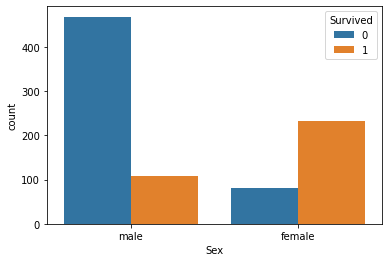

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train["Sex"], hue=train["Survived"])

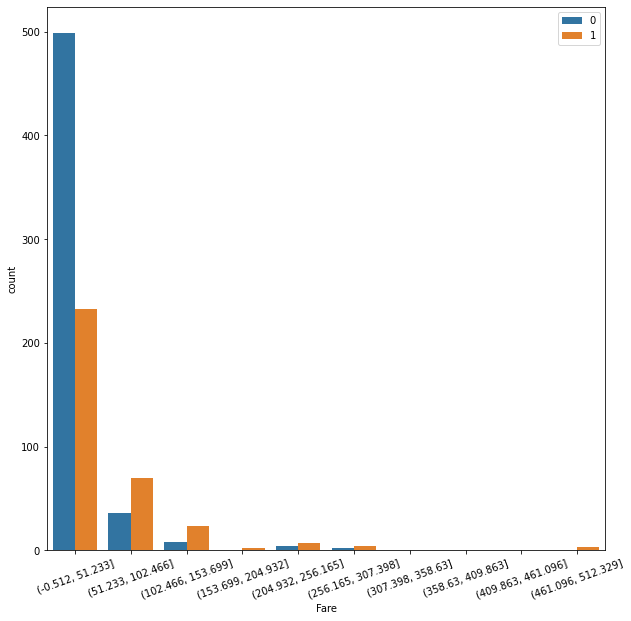

In [48]:
plt.figure(figsize=(10, 10))
c = pd.cut(train["Fare"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

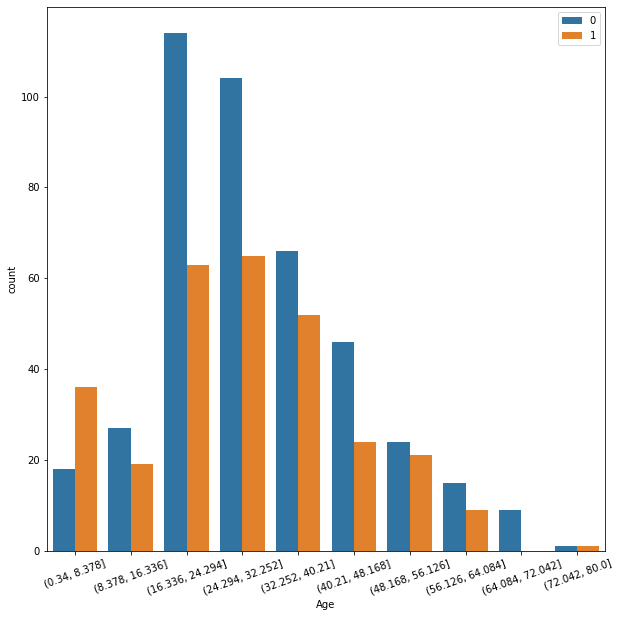

In [49]:
plt.figure(figsize=(10, 10))
c = pd.cut(train["Age"], bins=10)
sns.countplot(x=c, hue=train["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

In [28]:
# sklearn看到fit+transform
# 訓練: fit -> transform
# 測試: transform
from sklearn.preprocessing import MinMaxScaler
# scaling
scaler = MinMaxScaler()
combine_scale = pd.DataFrame(scaler.fit_transform(combine))
x_scale = combine_scale.iloc[:len(train)]
x_scale = np.array(x_scale)
x_predict_scale = combine_scale.iloc[len(train):]
x_predict_scale = np.array(x_predict_scale)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 100)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [31]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
